### Условие задачи

Считая элементы ХТС равнонадежными, с экспоненциально распределенной наработкой до отказа, рассчитайте вероятность безотказной работы системы в течение 8 000 часов. Вероятность безотказной работы элемента в течение 8 тыс. часов составляет 0.99. Рассчитайте среднюю наработку системы до отказа.
Постройте параметрический граф надежности ХТС и запишите логическую функцию работоспособности (ЛФР) системы или логическую функцию отказа (ЛФО). Поясните смысл логических переменных, которые входят в выражение для ЛФР/ЛФО.
 
 ![Блок-схема](https://sun9-49.userapi.com/impg/tvmQ4xK0HyGTmKdhyfXPd8cdHPTl015cvyIDEQ/ojquwnwhMRs.jpg?size=2204x412&quality=96&sign=38c191b23727b3863c224db6dd73548b&type=album)

## Решение

In [8]:
# Подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [9]:
t = 8000 #часов
p_1 = 0.99

lambda_1 = -math.log (p_1)/t

print('Интенсивность отказа элемента : %.4g' % (lambda_1))

Интенсивность отказа элемента : 1.256e-06


### Расчет ВБР системы методом свертки

Метод свертки предполагает расчет однородных блоков (только параллельное или последовательное соединение) с последующим укрупнением, "сворачиванием" блоков. На рисунке показана последовательность расчета блоков системы в данной задаче.

 ![](https://sun9-76.userapi.com/impg/RE-SuH8IuoB-RVehzvvs2lY_5Y31nQA9WO2Qog/6tHjSLiZnkA.jpg?size=775x252&quality=96&sign=1fe3f3e3eee22c0c9deb8b50a1bbe49a&type=album)

In [10]:
def p(t):
    return np.exp(-lambda_1 * t) #функция ВБР для элемента

Q = lambda t: 1 - p(t) #функция ВO для элемента

In [11]:
# Блок A - параллельное соединение трех элементов 1, 2, 3
Q_A = lambda t: Q(t)**3

# Блок B - параллельное соединение двух элементов 5, 6
Q_B = lambda t: Q(t)**2

# Блок С последовательное соединение блока A и элемента 4
P_C = lambda t: (1 - Q_A(t)) * p(t)

# Блок D последовательное соединение блока B и элемента 7
P_D = lambda t: (1 - Q_B(t)) * p(t)

# Блок F последовательное соединение блока C и D
P_F = lambda t: P_C(t) * P_D(t)

# Система - последовательное соединение блока F и элемента 8
P_S = lambda t: P_F(t) * p(t)

In [12]:
print('ВБР cистемы: %.4g ' % (P_S(t)))

ВБР cистемы: 0.9702 


### Расчет средней наработки до отказа

Средняя наработка до отказа системы: $$ T = \int\limits_0^\infty P_S(t) \,\mathrm{d}t $$

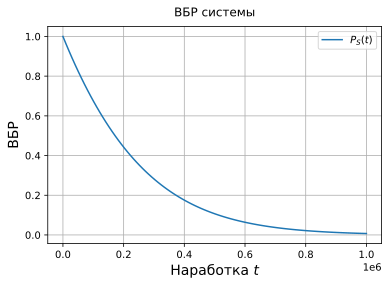

In [13]:
t = np.linspace(0, 1000000, 100)
plt.plot(t, P_S(t), label = r'$P_S(t)$')

plt.grid();
plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('ВБР', fontsize=14)
plt.legend(loc='best')
plt.title('ВБР системы', y = 1.02);

In [14]:
T_S, err = quad(P_S, 0, 1000000)

print('Средняя наработка системы до отказа : %.d часов' % (T_S))

Средняя наработка системы до отказа : 229036 часов


### Логическая функция работоспособности и логическая функция отказов

Блок-схема надежности:

 ![](svertka.png)

Элементарные высказывания: 
- $r_1$ - элемент 1 работает 
- $f_1$ - элемент 1 отказал

**Логическая функция работоспособности** - сложное высказывание: "Система работает":
$$ (r_1 \vee r_2 \vee r_3) \wedge r_4 \wedge (r_5\vee r_6) \wedge r_7 \wedge r_8 $$

**Логическая функция отказов** - сложное высказывание: "Система не работает":

$$ \overline{(r_1 \vee r_2 \vee r_3) \wedge r_4 \wedge (r_5\vee r_6) \wedge r_7 \wedge r_8} $$

Далее можно применить законы алгебры логики для упрощения формулы, и заменить высказывания: $$\overline{r_1} \equiv f_1 $$

Однако можно напрямую записать условие отказа системы исходя из отказов элементов:
$$(f_1 \wedge f_2 \wedge f_3) \vee f_4 \vee (f_5 \wedge f_6) \vee f_7 \vee f_8$$

### Параметрический граф надежности

Параметрический граф надежности - более компактный аналог блок-схемы надежности, в котором ненадежные элементы представлены дугами графа. Веса дуг графа - ВБР соответствующих элементов.
 
![](https://sun1-57.userapi.com/impg/hMSlwc5sZPgC9ZUyy2J-BMwQNPjrczrstGwlPw/xIsmddHojqU.jpg?size=471x128&quality=96&sign=4f508d3b75e229213a476a088bad8fcf&type=album)